In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import timeit
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN

%alias_magic t timeit

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


image = h5py.File('images-res100.h5', 'r')
image.keys()


Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


<KeysViewHDF5 ['X', 'Y']>

In [2]:
X = image.get('X')

In [3]:
X_tot = np.array(X)

In [4]:
Y = image.get('Y')
Y_tot = np.array(Y)

print(X)
print(Y)

#X and Y matrices
print(X_tot.shape)
print(Y_tot.shape)

<HDF5 dataset "X": shape (191611, 16, 16, 16, 4), type "<f8">
<HDF5 dataset "Y": shape (191611, 2), type "<f8">
(191611, 16, 16, 16, 4)
(191611, 2)


## Constructing Train and Test sets

In [5]:
from sklearn.utils import shuffle
#X, Y = shuffle(X_tot,Y_tot, random_state = 0 )
idx = np.arange(0,len(Y_tot))
#shuffeling the indexes:
np.random.shuffle(idx)
print(idx)

[  6420 122277 104792 ... 176336  27335  99580]


In [6]:
#Now with the shuffled indexes, shuffeling the X_tot and Y_tot matrices 
X = X_tot[idx]
Y = Y_tot[idx]
print('Data shuffled!')

Data shuffled!


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#X_train, X_test, Y_train, Y_test = train_test_split(X_tot, Y_tot, test_size = 0.3, random_state=0)

#the function takes too long time to work so I should make the sets by hand!

train_size = int(0.3*len(Y_tot))

#we can make the train and test sets now that the data shuffled only by choosing the first train_size number of them as 
#train set and others as test set.

X_train = X[:train_size]
X_test = X[train_size:]

Y_train = Y[:train_size]
Y_test = Y[train_size:]

print('Test sets:')
print('X:',X_test.shape, 'Y:', Y_test.shape )

print('Train sets:')
print('X:',X_train.shape, 'Y:', Y_train.shape )

Test sets:
X: (134128, 16, 16, 16, 4) Y: (134128, 2)
Train sets:
X: (57483, 16, 16, 16, 4) Y: (57483, 2)


In [8]:
# # savint the train and test sets of X and Y because it took tooooooooooooo long time for producing them.

# import h5py

# image = h5py.File('train-test-set.h5', 'w')

# image.create_dataset('X_train', data=X_train)


In [9]:
# image.create_dataset('X_test', data=X_test)
# print('X entered')

In [10]:
# image.create_dataset('Y_train', data=Y_train)

# image.create_dataset('Y_test', data=Y_test)

# image.close()
# print('All made')

## Implementing the CNN model

In [78]:
n_h, n_w, n_l, n_s = X[0].shape
print(n_h, n_w, n_l, n_s)

## Data needs to be reshaped for the convolution layers. 
X = X.reshape(-1, n_h, n_w, n_l, n_s)
#X_test = X_test.reshape(-1, n_h, n_w, n_l, n_s)


16 16 16 4


In [103]:
import tensorflow as tf
from tensorflow import keras

new_model = keras.models.Sequential()

tf.keras.layers.GlobalAveragePooling3D()
new_model.add(keras.layers.Conv3D(32, (5,5,5)  , activation = 'sigmoid' , padding = 'same' , input_shape=(n_h, n_w, n_l, n_s)))
new_model.add(keras.layers.Conv3D(32, (3,3,1) , padding = 'valid' , activation = 'relu' ))

new_model.add(keras.layers.MaxPooling3D((2,2,1) , padding = 'same'))
new_model.add(keras.layers.Conv3D(64, (3,3,1) , padding = 'same' , activation = 'relu' ))
new_model.add(keras.layers.Conv3D(64, (4,4,1) , padding = 'valid' , activation = 'relu' ))
new_model.add(keras.layers.MaxPooling3D((2,2,1) , padding = 'valid'))
new_model.add(keras.layers.Dropout(0.25))
new_model.add(keras.layers.Flatten())

new_model.add(keras.layers.Dense(120 , activation = 'relu'))
new_model.add(keras.layers.Dense(60 , activation = 'relu'))
new_model.add(keras.layers.Dense(41, activation = 'softmax'))
              
new_model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy' ])



In [104]:
history = new_model.fit(X[:8000] , Y[:8000, 0], epochs = 50 , batch_size = 500, validation_split= .75)

Train on 2000 samples, validate on 6000 samples
Epoch 1/50
2000/2000 [==============================] - 65s 33ms/sample - loss: 3.7064 - accuracy: 0.0335 - val_loss: 3.6042 - val_accuracy: 0.0678
Epoch 2/50
2000/2000 [==============================] - 64s 32ms/sample - loss: 3.5342 - accuracy: 0.0800 - val_loss: 3.4078 - val_accuracy: 0.1033
Epoch 3/50
2000/2000 [==============================] - 65s 32ms/sample - loss: 3.3327 - accuracy: 0.1285 - val_loss: 3.2419 - val_accuracy: 0.1610
Epoch 4/50
2000/2000 [==============================] - 65s 33ms/sample - loss: 3.1359 - accuracy: 0.1880 - val_loss: 3.0334 - val_accuracy: 0.2150
Epoch 5/50
2000/2000 [==============================] - 64s 32ms/sample - loss: 2.9336 - accuracy: 0.2420 - val_loss: 2.8436 - val_accuracy: 0.2703
Epoch 6/50
2000/2000 [==============================] - 64s 32ms/sample - loss: 2.6994 - accuracy: 0.2845 - val_loss: 2.6644 - val_accuracy: 0.3107
Epoch 7/50
2000/2000 [==============================] - 64s 32ms

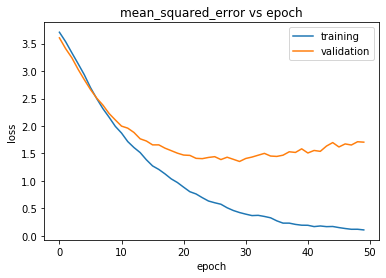

In [105]:
import matplotlib.pyplot as plt
fig = plt.figure()
xlabel = 'epoch'
ylabel = 'loss'
plt_title = 'mean_squared_error vs epoch'
ax = fig.add_subplot(111,xlabel = xlabel , ylabel = ylabel , title = plt_title)
ax.plot(history.history['loss'] , label ='training')
plt.legend()
ax.plot(history.history['val_loss'] , label = 'validation')
plt.legend()
plt.show()

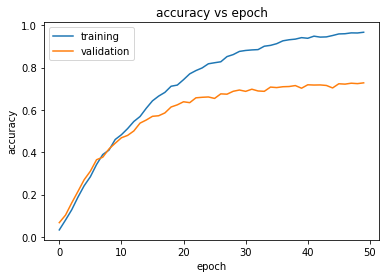

In [106]:
import matplotlib.pyplot as plt
fig = plt.figure()
xlabel = 'epoch'
ylabel = 'accuracy'
plt_title = 'accuracy vs epoch'
ax = fig.add_subplot(111,xlabel = xlabel , ylabel = ylabel , title = plt_title)
ax.plot(history.history['accuracy'] , label ='training')
plt.legend()
ax.plot(history.history['val_accuracy'] , label = 'validation')
plt.legend()
plt.show()

In [107]:
new_model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_76 (Conv3D)           (None, 16, 16, 16, 32)    16032     
_________________________________________________________________
conv3d_77 (Conv3D)           (None, 14, 14, 16, 32)    9248      
_________________________________________________________________
max_pooling3d_37 (MaxPooling (None, 7, 7, 16, 32)      0         
_________________________________________________________________
conv3d_78 (Conv3D)           (None, 7, 7, 16, 64)      18496     
_________________________________________________________________
conv3d_79 (Conv3D)           (None, 4, 4, 16, 64)      65600     
_________________________________________________________________
max_pooling3d_38 (MaxPooling (None, 2, 2, 16, 64)      0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 2, 2, 16, 64)    

In [108]:
#Confusion matrix on the data which we applied training:
import sys
np.set_printoptions(threshold=sys.maxsize)

Y_predicted = np.argmax( new_model.predict(X[:1000]) , axis=1 )
cm = confusion_matrix(Y[:1000,0], Y_predicted)
print(cm)

[[22  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [114]:
#Confusion matrix on new data
Y_predicted1 = np.argmax( new_model.predict(X[8000:10000]) , axis=1 )
cm = confusion_matrix(Y[8000:10000,0], Y_predicted1)
print(cm)

[[13  5  4  4  6  3  2  4  0  0  2  1  1  1  0  1  1  0  0  0  0  0  1  0
   0  0  0  1  0  1  1  0  0  2  0  1  0  0  0  0]
 [ 1 15  1  6  4  2  1  1  3  0  1  0  2  1  0  0  0  3  1  0  0  0  2  0
   0  0  0  0  1  1  0  2  0  0  0  1  0  0  0  5]
 [ 2  0 25  0  1  2  3  2  3  2  0  1  1  0  1  1  0  0  1  0  0  0  1  0
   0  0  0  0  0  2  1  0  0  0  0  0  0  0  0  0]
 [ 2  0  5 10  1  1  1  0  0  1  0  0  1  0  2  1  0  1  1  0  0  0  0  0
   0  0  0  1  3  2  0  0  1  0  1  0  0  0  0  2]
 [ 1  1  1  1 27  1  4  0  0 10  3  1  1  1  5  2  2  0  0  0  1  0  0  0
   0  0  0  0  0  0  0  0  0  1  0  2  0  0  0  3]
 [ 6  0  4  3  0 18  0  0  1  0  0  0  2  1  0  0  3  3  1  0  0  0  0  0
   2  2  1  0  0  0  0  0  0  2  1  2  0  0  0  3]
 [ 0  0  0  0  1  3 19  0  0  0  0  0  2  0  4  1  0  0  0  0  0  0  1  0
   0  0  0  0  0  0  2  0  0  1  0  4  0  0  0  0]
 [ 1  4  1  1  0  0  0 31  0  3  0  0  0  1  1  0  0  1  0  0  1  0  2  0
   0  0  0  0  1  0  4  0  2  0  2  0  0  0  0  0]


In [115]:
from sklearn.metrics import accuracy_score
a = accuracy_score( Y_predicted,Y[:1000,0])
print('Accuracy on train set is:', a*100)

Accuracy is: 99.2


In [116]:
a = accuracy_score( Y_predicted1,Y[8000:10000,0])
print('Accuracy on test set is:', a*100)

Accuracy on test set is: 72.2
